In [1]:
from datetime import datetime as dt
import sys
import warnings
warnings.filterwarnings('ignore')

In [29]:
from icecream import ic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pprint import pprint

In [3]:
sys.path.append('../src/')
import helper
import logreg

In [4]:
today = dt.today().isoformat().split("T")[0]
today

'2021-12-05'

In [5]:
datapath = '../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [6]:
ibm = pd.read_csv(datapath)

In [7]:
data_loader = helper.IBMData(datapath, verbose=True)
X, y = data_loader.separate_response


Split X and y...
self.X.shape (1470, 34)
self.y.shape (1470,)


In [8]:
data_pp = helper.PreProcess(X, verbose=True)
data_pp.preprocess_data()


The following categorical_columns have been label encoded: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

The following categorical_columns have been binarized: ['Gender', 'Over18', 'OverTime']


In [9]:
preprocessed_X = data_pp.pp_X

preproccessed_X_and_y = pd.concat([preprocessed_X, y], axis=1)
preproccessed_X_and_y.shape

(1470, 35)

In [10]:
std_sc = StandardScaler()

In [11]:
pp_stdsc_X = std_sc.fit_transform(preprocessed_X)
pp_stdsc_X_df = pd.DataFrame(pp_stdsc_X, columns=preprocessed_X.columns)

In [12]:
response_col = 'Attrition'

cat_num_cols = ["Education", "EnvironmentSatisfaction", "JobInvolvement",
                "JobLevel", "JobSatisfaction", "NumCompaniesWorked", "PerformanceRating", 
                "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance"]

numeric_cols = [col for col in ibm.columns if (type(ibm.loc[0, col]) != str) 
                and (col not in cat_num_cols) 
                and (col != response_col)]

categoricals = [col for col in ibm.columns if (col not in numeric_cols) and 
                (col not in cat_num_cols) and 
                (col != response_col)]

### Train Test Split

In [13]:
preprocessed_y = [1 if r == 'Yes' else 0 for r in y]
preprocessed_y[:5]

[1, 0, 1, 0, 0]

In [14]:
print(y[:5])

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


In [15]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, preprocessed_y, test_size=0.25)

#### SMOTE Rebalance the Training Data ONLY

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [18]:
ic(X_res.shape)
ic(len(y_res))

ic| X_res.shape: (1848, 34)
ic| len(y_res): 1848


1848

In [19]:
pd.Series(y_res).value_counts()

0    924
1    924
dtype: int64

### LogisticRegression

In [20]:
lr = logreg.LogisticRegress(X_res, y_res, verbose=True)

In [21]:
y_test_pred = lr.predict(X_test)


Generating predictions...

Logistic Regression parameters: {'penalty': 'none', 'random_state': 42, 'verbose': 1, 'n_jobs': -1}...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28094D+03    |proj g|=  9.71254D+05

At iterate   50    f=  1.16974D+03    |proj g|=  3.29666D+04

At iterate  100    f=  1.13867D+03    |proj g|=  2.11574D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   35    100    118      1     0     0   2.116D+04   1.139D+03
  F =   1138.6650449204390     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

Logistic Regression fitted on X, and y...

y_pred shape: (368,), y_pr

 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


In [22]:
y_train_pred = lr.predict(X_train)


Generating predictions...

Logistic Regression parameters: {'penalty': 'none', 'random_state': 42, 'verbose': 1, 'n_jobs': -1}...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28094D+03    |proj g|=  9.71254D+05

At iterate   50    f=  1.16974D+03    |proj g|=  3.29666D+04

At iterate  100    f=  1.13867D+03    |proj g|=  2.11574D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   35    100    118      1     0     0   2.116D+04   1.139D+03
  F =   1138.6650449204390     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

Logistic Regression fitted on X, and y...

y_pred shape: (1102,), y_p

 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [23]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred[0]), 
                        columns=['predicted No Attrition', 'predicted Attrition'],
                        index=['actual No Attrition', 'actual Attrition'])

conf_mat

,predicted No Attrition,predicted Attrition
actual No Attrition,203,106
actual Attrition,24,35


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
accuracy_score(y_test, y_test_pred[0])

0.6467391304347826

In [26]:
precision_score(y_test, y_test_pred[0])

0.24822695035460993

In [27]:
recall_score(y_test, y_test_pred[0])

0.5932203389830508

<Figure size 1080x504 with 0 Axes>

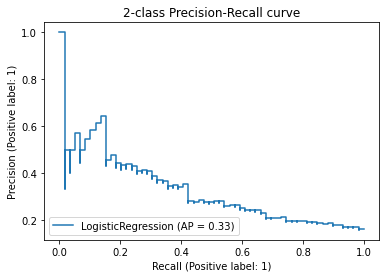

/opt/miniconda3/envs/sim-proj/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/sim-proj/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [31]:
plt.figure(1, figsize=(15, 7))
display = PrecisionRecallDisplay.from_estimator(
    lr.lr, X_test, y_test, name="LogisticRegression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
plt.show()

In [38]:
feat_coeffs = list(zip(lr.X.columns, lr.lr.coef_[0]))
sorted(feat_coeffs, key=lambda x: x[1], reverse=True)[:5]

[('StandardHours', 0.04628194474406669),
 ('DistanceFromHome', 0.02885858812077894),
 ('YearsSinceLastPromotion', 0.014950316943923157),
 ('NumCompaniesWorked', 0.005584283925736215),
 ('OverTime', 0.003893283010697477)]